In [25]:
import main_file as mf
import importlib
importlib.reload(mf)
from main_file import *
import matplotlib.pyplot as plt

In [26]:
dfv1 = mf.df.copy()
dfv1["date_mise_en_service"] = dfv1["date_mise_en_service"].dt.round("30D")
dfv1 = dfv1[dfv1["date_mise_en_service"]<pd.to_datetime("2024-04-30")]

In [27]:
dfv = dfv1.sort_values(by="date_mise_en_service")\
  .groupby(["date_mise_en_service","puissance_nominale_cat"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()
  
dfv["id_pdc_itinerance"] = dfv.groupby(["puissance_nominale_cat"])\
  ["id_pdc_itinerance"]\
  .cumsum()

C:\Users\bensa\AppData\Local\Temp\ipykernel_23284\2512137388.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\bensa\AppData\Local\Temp\ipykernel_23284\2512137388.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

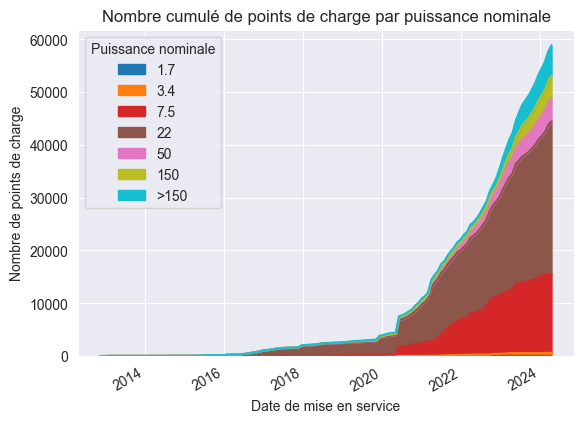

In [28]:
# Préparation des données pour Matplotlib
pivot_dfv = dfv.pivot(index='date_mise_en_service', columns='puissance_nominale_cat', values='id_pdc_itinerance').fillna(0)

# Création du graphique de zone empilé avec Matplotlib
plt.figure(figsize=(10, 6))
pivot_dfv.plot(kind='area', stacked=True, cmap='tab10')
plt.title("Nombre cumulé de points de charge par puissance nominale")
plt.xlabel("Date de mise en service")
plt.ylabel("Nombre de points de charge")
plt.legend(title="Puissance nominale")
plt.show()

In [29]:
dfv = dfv1.sort_values(by="date_mise_en_service")\
  .groupby(["date_mise_en_service","prise_type_2"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()

dfv["id_pdc_itinerance"] = dfv.groupby(["prise_type_2"])\
  ["id_pdc_itinerance"]\
  .cumsum()

<Figure size 1000x600 with 0 Axes>

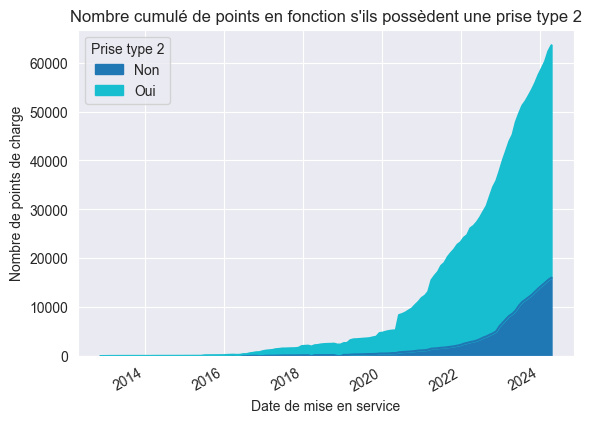

In [30]:
# Préparation des données pour Matplotlib
pivot_dfv = dfv.pivot(index='date_mise_en_service', columns='prise_type_2', values='id_pdc_itinerance').fillna(0)

# Création du graphique de zone empilé avec Matplotlib
plt.figure(figsize=(10, 6))
pivot_dfv.plot(kind='area', stacked=True, cmap='tab10')
plt.title("Nombre cumulé de points en fonction s'ils possèdent une prise type 2")
plt.xlabel("Date de mise en service")
plt.ylabel("Nombre de points de charge")
plt.legend(title="Prise type 2")
plt.show()

In [31]:

dfv = dfv1.sort_values(by="date_mise_en_service")\
  .groupby(["date_mise_en_service","prise_type_combo_ccs"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()
  
dfv["id_pdc_itinerance"] = dfv.groupby(["prise_type_combo_ccs"])\
  ["id_pdc_itinerance"]\
  .cumsum()

dfv.sort_values(by="prise_type_combo_ccs", inplace=True)

<Figure size 1000x600 with 0 Axes>

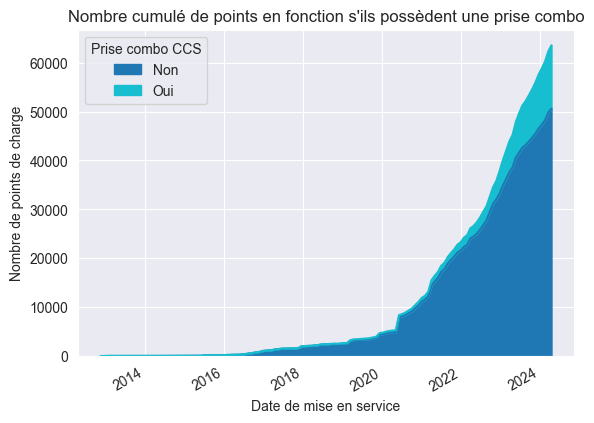

In [32]:
# Préparation des données pour Matplotlib
pivot_dfv = dfv.pivot(index='date_mise_en_service', columns='prise_type_combo_ccs', values='id_pdc_itinerance').fillna(0)

# Création du graphique de zone empilé avec Matplotlib
plt.figure(figsize=(10, 6))
pivot_dfv.plot(kind='area', stacked=True, cmap='tab10')
plt.title("Nombre cumulé de points en fonction s'ils possèdent une prise combo")
plt.xlabel("Date de mise en service")
plt.ylabel("Nombre de points de charge")
plt.legend(title="Prise combo CCS")
plt.show()